# KNN 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
X = df.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = df['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.11090
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.53,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075
210,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.24,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865


In [15]:
# scale the data cuz knn works by calculating distances

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score   
accuracy_score(y_test, y_pred)

0.972027972027972

K : 1, Accuracy : 0.958041958041958
K : 2, Accuracy : 0.972027972027972
K : 3, Accuracy : 0.972027972027972
K : 4, Accuracy : 0.9790209790209791
K : 5, Accuracy : 0.972027972027972
K : 6, Accuracy : 0.9790209790209791
K : 7, Accuracy : 0.965034965034965
K : 8, Accuracy : 0.972027972027972
K : 9, Accuracy : 0.972027972027972
K : 10, Accuracy : 0.972027972027972
K : 11, Accuracy : 0.972027972027972
K : 12, Accuracy : 0.9790209790209791
K : 13, Accuracy : 0.9790209790209791
K : 14, Accuracy : 0.972027972027972
K : 15, Accuracy : 0.972027972027972


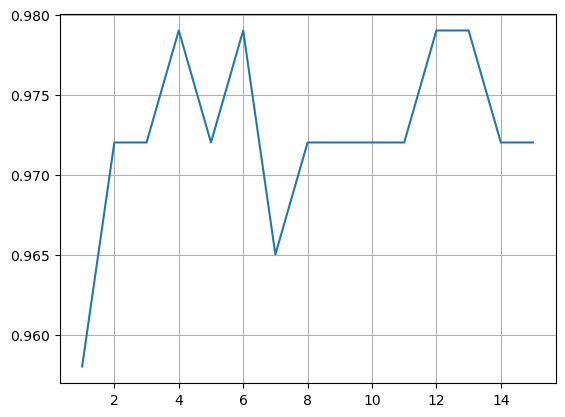

In [38]:
# Adjusting the value of k
acc = []
for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print(f'K : {k}, Accuracy : {accuracy}')

import matplotlib.pyplot as plt
plt.plot(range(1,16), acc)
plt.grid()

### 13 seems okay (avoid choosing 4,6,12 as they are even values)

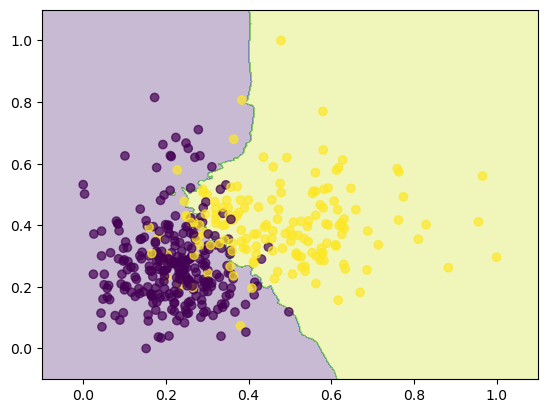

In [62]:
# plotting

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def plot_decision_regions(n_neighbors=5):
    y_train_trf = le.fit_transform(y_train)
    
    x_ = np.linspace(min(X_train[:,0])-0.1, max(X_train[:,0])+0.1, 500)
    y_ = np.linspace(min(X_train[:,1])-0.1, max(X_train[:,1])+0.1, 500)
    XX, YY = np.meshgrid(x_, y_)
        
    XY_plot = np.concatenate((XX.reshape(-1,1), YY.reshape(-1,1)), axis=1)   
        
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train[:, [0,1]], y_train_trf)
    Z = knn.predict(XY_plot).reshape(XX.shape)
        
    plt.contourf(XX, YY, Z, alpha=0.3)

    plt.scatter(X_train[:,0], X_train[:,1], c=y_train_trf, alpha=0.7)


plot_decision_regions(n_neighbors=13)

## Overfitting and Underfitting

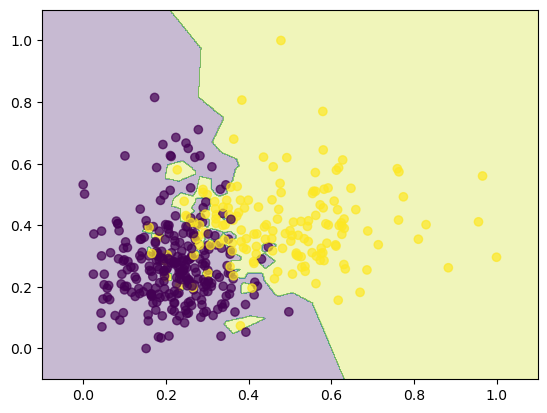

In [63]:
# small values of k - overfitting

plot_decision_regions(n_neighbors=1)

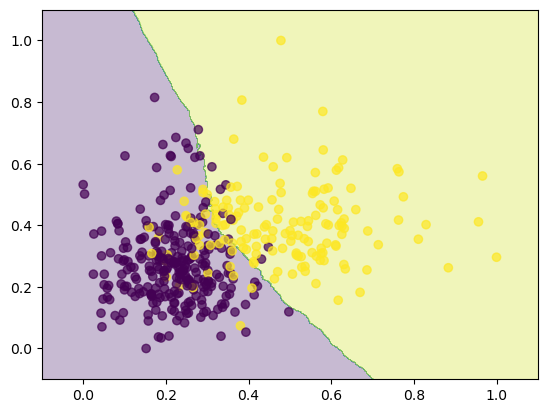

In [64]:
# large values of k - underfitting

plot_decision_regions(n_neighbors=100)